<h1>Evaluation of Crime Data for Seattle and San Francisco for Summer of 2014</h1>
 
<h3>Primary Findings:</h3>
<ul>
    <li>Fridays are the day of the week with the highest number of crimes committed in both cities
    <li>In San Francisco, Wednesday had the the highest number of 'WARRANT' and "SUSPICIOUS OCC" crimes committed
    <li>These offenses occurred more often on weekdays than they did on Saturdays or Sundays </li>
    <li>"LARCENY/THEFT" offenses, on the other hand, occurred more often on weekends than they did on other weekdays. These offenses occured the least on Wednesdays.</li>
 </ul>
        
        
<h3>Details</h3>
In this notebook we analyze the crime statistics data for San Francisco and Seattle for the summer of 2014, trying to answer the following questions:
<ul>
    <li>What day of the week are the most crimes committed? The least crimes?
    <li>Are there other trends of interest based on the day of the week the crimes are commmited?
</ul>

This notebook was written in R using the ggplot2 package.

Step 1: Read in Data from Summer 2014 from CSV files provided

In [340]:
sanFran <- read.csv("sanfrancisco_incidents_summer_2014.csv")
seattle <- read.csv("seattle_incidents_summer_2014.csv")

Step 2: <b> What days have the most and least number of crimes committed, in each city? </b>

Note: Seattle data did not include day of week, so first we must add these values.

In [341]:
seattle$dayOfWeek <- weekdays(as.Date(seattle$Occurred.Date.or.Date.Range.Start, format = "%m/%d/%Y %I:%M:%S %p"))

First for San Francisco and then for Seattle, the bar charts below count all crimes by day of week. 
Days (columns) are arranged in descending order of crime frequency.

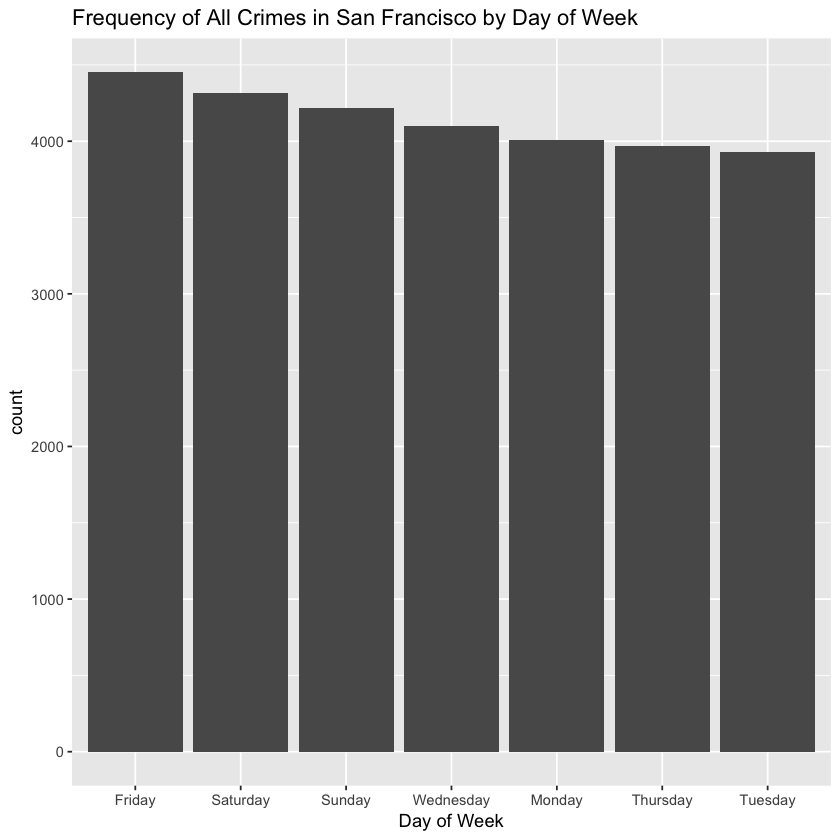

In [342]:
ggplot(sanFran,
       aes(x=reorder(DayOfWeek,DayOfWeek, function(x)-length(x)))) +
       geom_bar()+ labs(x = "Day of Week", title = "Frequency of All Crimes in San Francisco by Day of Week")

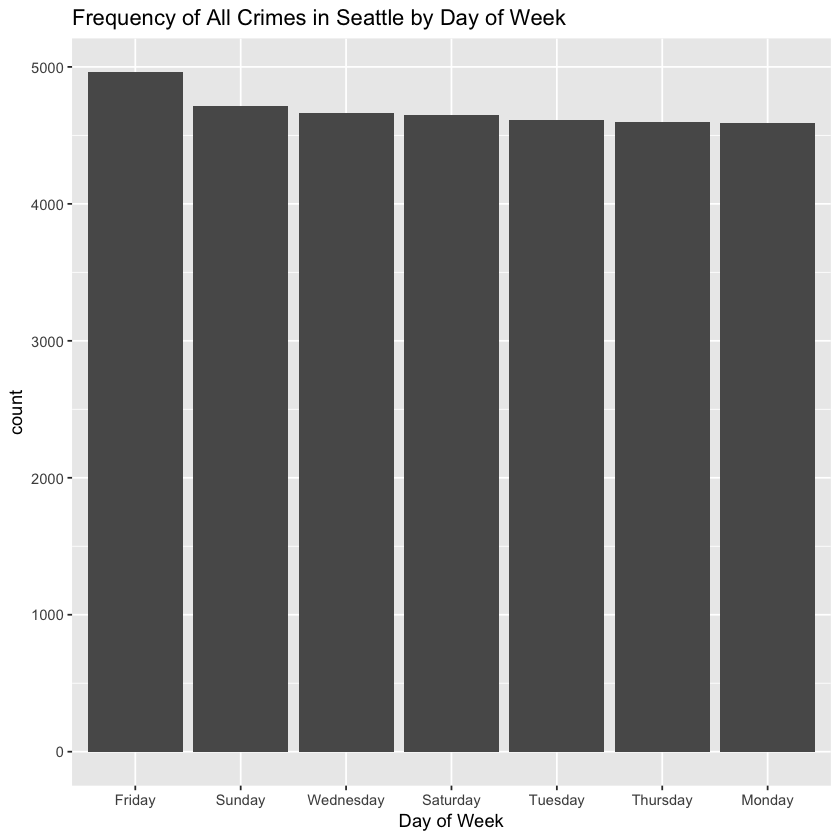

In [343]:
ggplot(seattle,
       aes(x=reorder(dayOfWeek,dayOfWeek, function(x)-length(x)))) +
       geom_bar()+ labs(x = "Day of Week", title = "Frequency of All Crimes in Seattle by Day of Week") 

<b>Discussion</b>
Interestingly, <b>Friday is the most common day for crimes in both cities.</b> However, while crimes are more common on Fridays and weekends in San Francisco, there is no such trend in Seattle, and the least-common days for crime are different between the two cities.

Step 3: <b>What are the most common crimes committed in San Francisco?</b>
Using the ggplot package in R, the command below shows a bar chart of the occurences of each 'Category' of crime. The Categories are reorderd be the frequency of their occurence, and the X and Y axis are flipped so that the Category names appear on the Y axis for readability.

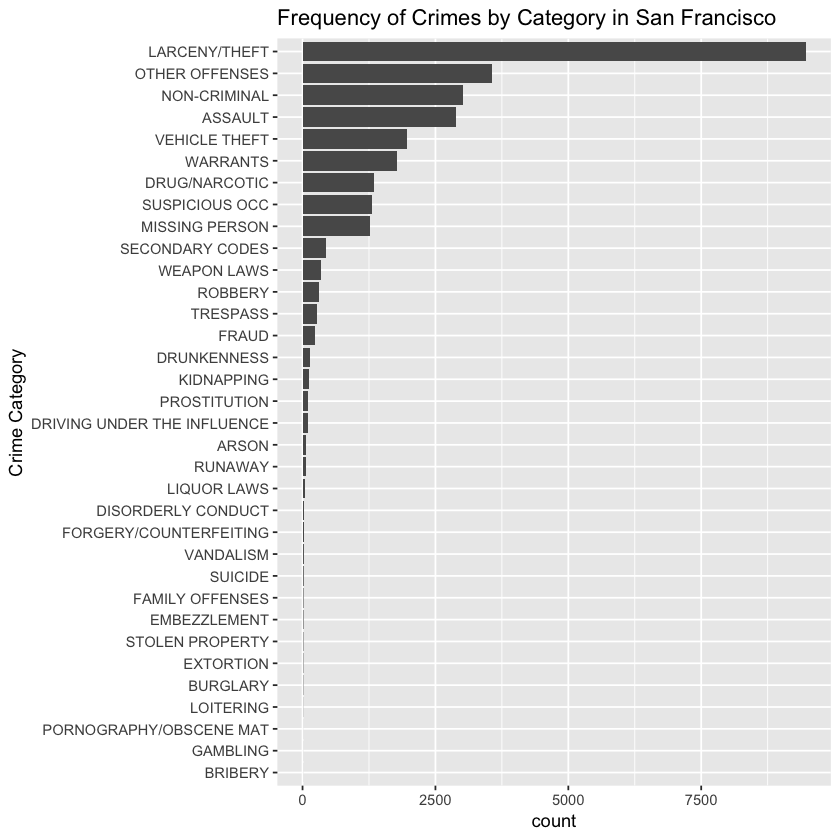

In [344]:
ggplot(sanFran, aes(x=reorder(Category,Category,
                     function(x)+length(x)), label = length(Category)))+ geom_bar()+ 
                              coord_flip() + labs(x = "Crime Category", title = "Frequency of Crimes by Category in San Francisco") 
                         
                              
                              
                              

Step 4: Of these crime categories,let's examine only the top 10 categories for clarity in our graphs when looking at trends.

In [329]:
sanFranTop10 = subset (sanFran, Category %in%
                       c("LARCENY/THEFT", "OTHER OFFENSES", "NON-CRIMINAL", "ASSAULT", "VEHICLE THEFT", "WARRANTS", "DRUG/NARCOTIC", "SUSPICIOUS OCC", "MISSING PERSON", "SECONDARY CODES"))

Step 5: <b>What kinds of trends for these crime categories can we see when examining them by Day of Week?</b>

Below we create a stacked bar chart of these crimes counted by day.

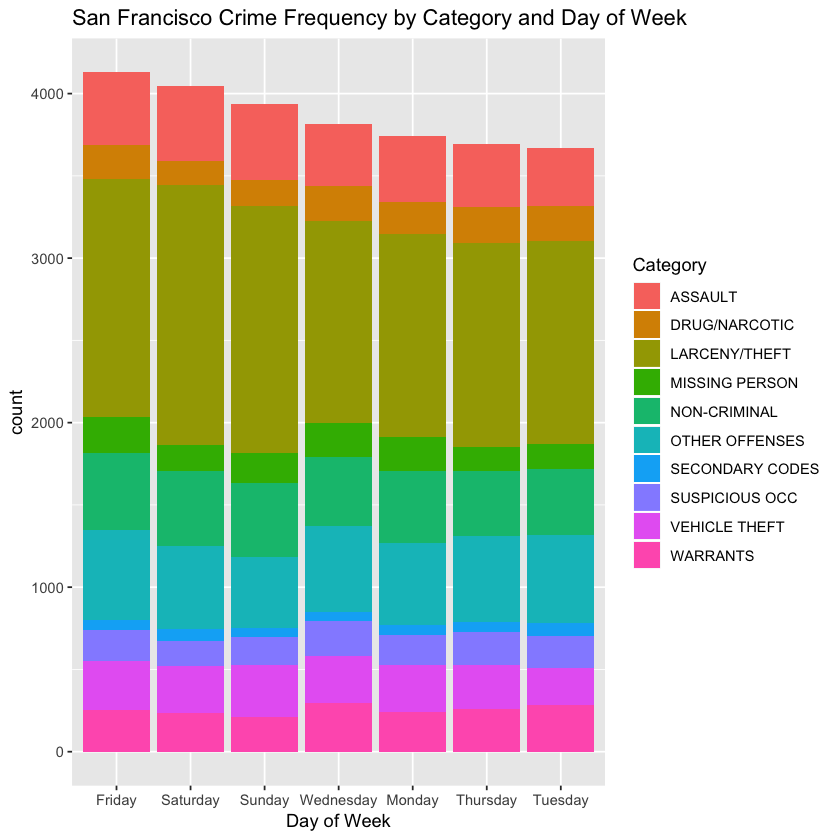

In [348]:
ggplot(sanFranTop10,
       aes(x=reorder(DayOfWeek,DayOfWeek,
                     function(x)-length(x)), fill=Category)) +
       geom_bar()+theme(legend.position="right")+ labs(x = "Day of Week", title = "San Francisco Crime Frequency by Category and Day of Week") 

One trend you can see from the chart above is that <b>Wednesday is the most common day for WARRANTS crimes, and also for SUSPICIOUS OCC. 
    
However, it is the least common day for LARCENY/THEFT.</b>

Let's look at the trends for these crimes alone by day of week in more detail.

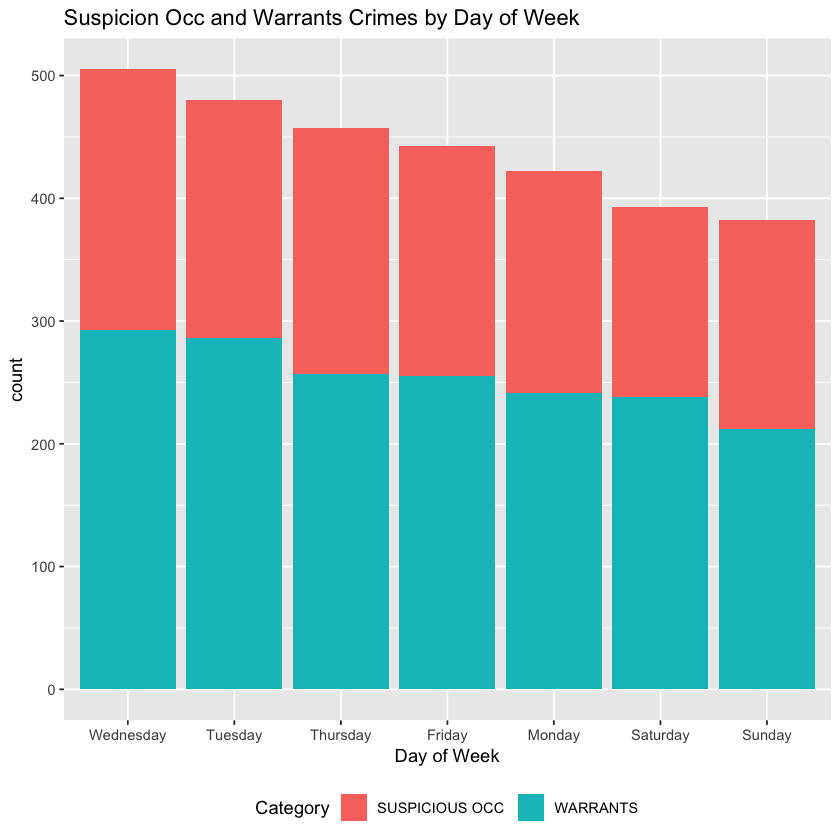

In [350]:
ggplot(subset(sanFran, Category %in% c("WARRANTS", "SUSPICIOUS OCC")),
       aes(x=reorder(DayOfWeek,DayOfWeek,
                     function(x)-length(x)), fill = Category)) +
       geom_bar() +theme(legend.position="bottom")+ labs(x = "Day of Week", title = "Suspicion Occ and Warrants Crimes by Day of Week") 

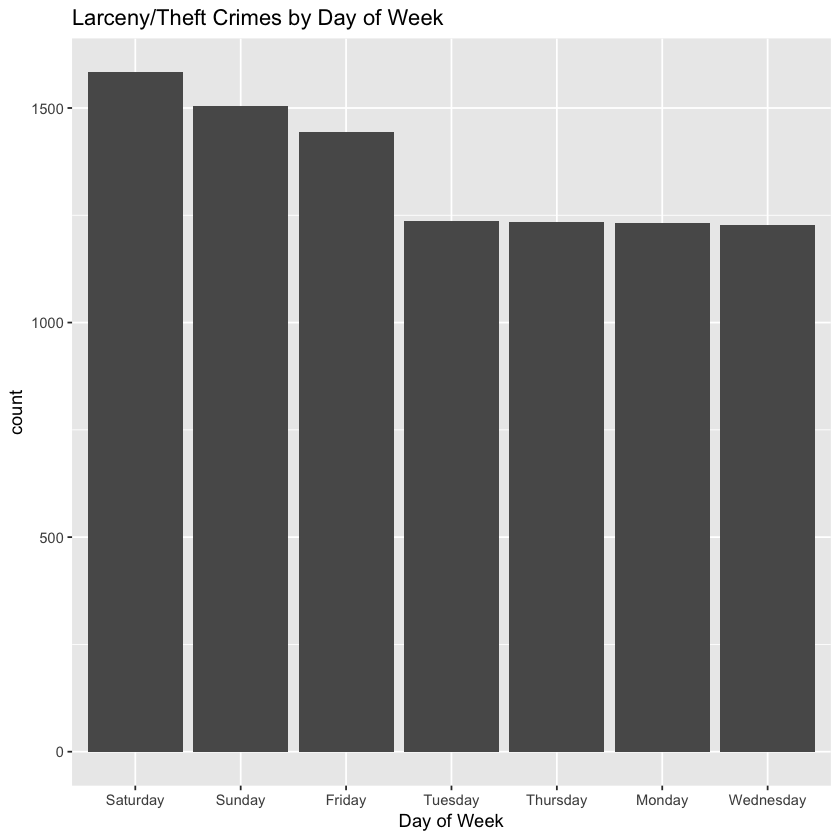

In [351]:
ggplot(subset(sanFran, Category == "LARCENY/THEFT"),
       aes(x=reorder(DayOfWeek,DayOfWeek,
                     function(x)-length(x)))) +
       geom_bar() +theme(legend.position="bottom")+ labs(x = "Day of Week", title = "Larceny/Theft Crimes by Day of Week") 
                     

<b>Discussion:</b> In San Francisco, crimes with either "WARRANTS" or "SUSPICIOUS OCC" as their Category occurred more often on weekdays than they did on weekends, but "LARCENY/THEFT" offenses were recorded more often on Saturday and Sunday than on weekdays.